In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Cleaned_ecommerce_sales_34500.csv')
df.head()

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,...,total_amount,shipping_cost,profit_margin,customer_age,customer_gender,computed_order_total,order_total,order_total_diff,returned_flag,is_return
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,2023-12-23,4,...,139.47,7.88,31.17,60,Female,164.08,139.47,24.61,False,False
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,2025-04-03,6,...,24.73,4.60,-2.62,37,Male,24.73,24.73,0.00,False,False
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,2024-10-08,4,...,166.80,6.58,13.44,34,Male,175.58,166.80,8.78,False,False
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,2024-09-14,6,...,63.67,5.50,2.14,21,Female,63.67,63.67,0.00,False,False
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,2024-12-21,6,...,13.88,2.74,1.15,39,Male,16.33,13.88,2.45,False,False


# **Data Cleaning**

In [ ]:
df.shape

(34500, 22)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,34500.0,119.391632,195.620477,1.01,16.69,45.66,130.9500,2930.47
discount,34500.0,0.049291,0.069894,0.00,0.00,0.00,0.1000,0.30
quantity,34500.0,1.490725,0.932270,1.00,1.00,1.00,2.0000,5.00
delivery_time_days,34500.0,4.814203,1.242141,3.00,4.00,5.00,6.0000,13.00
total_amount,34500.0,170.008494,357.503014,0.82,19.71,56.82,168.5300,12931.80
shipping_cost,34500.0,6.152120,2.389539,0.00,4.42,6.09,7.8300,15.65
profit_margin,34500.0,28.116505,53.352947,-6.20,1.50,10.55,33.1325,1536.17
customer_age,34500.0,43.474377,14.980682,18.00,31.00,43.00,56.0000,69.00
computed_order_total,34500.0,178.951054,374.833141,1.01,20.84,59.76,178.0550,12931.80
order_total,34500.0,170.008494,357.503014,0.82,19.71,56.82,168.5300,12931.80


# Are there any completely duplicate rows?

In [ ]:
df.duplicated().sum()

np.int64(0)

# Handling Missing Values

In [ ]:
df.isna().sum()

,0
order_id,0
customer_id,0
product_id,0
category,0
price,0
discount,0
quantity,0
payment_method,0
order_date,0
delivery_time_days,0


# If null Exists then--

In [ ]:
df.dropna(inplace=True)

# Data Type Validation

In [ ]:
df.dtypes

,0
order_id,object
customer_id,object
product_id,object
category,object
price,float64
discount,float64
quantity,int64
payment_method,object
order_date,object
delivery_time_days,int64


In [ ]:
# Convert the 'customer_age' column to string type
#df['customer_age'] = df['customer_age'].astype(str)
#df['customer_age'] = df['customer_age'].astype(int)

# **Sales Performance**

# What is the total revenue and total profit generated in the dataset?

In [ ]:
total_revenue = df['total_amount'].sum()

total_profit = df['profit_margin'].sum()

print(total_revenue)
print(total_profit)

5865293.050000001
970019.4099999999


# What is the distribution of customers by customer_gender? What is the average customer_age?

In [ ]:
gender_distribution = df['customer_gender'].value_counts()
print("Customer Gender Distribution:")
print(gender_distribution)

average_customer_age = df['customer_age'].mean()
print("\nAverage Customer Age: ", average_customer_age)

Customer Gender Distribution:
customer_gender
Female    16818
Male      16310
Other      1372
Name: count, dtype: int64

Average Customer Age:  43.474376811594205


# Which category has the highest number of orders? Which has the highest total sales?

In [ ]:
category_order_counts = df['category'].value_counts()
category_order_counts = category_order_counts.sort_values(ascending=False)
print(category_order_counts)
most_popular_category = category_order_counts.index[0]
print("\nCategory with the highest number of orders: ", most_popular_category)

category_sales = df.groupby('category')['total_amount'].sum()
category_sales = category_sales.sort_values(ascending=False)
print('\n',category_sales)
highest_sales_category = category_sales.idxmax()
print("\nCategory with the highest total sales: ", highest_sales_category)

category
Fashion        6254
Electronics    6180
Home           5487
Toys           4247
Sports         4171
Beauty         4103
Grocery        4058
Name: count, dtype: int64

Category with the highest number of orders:  Fashion

 category
Electronics    3319206.50
Home           1077681.52
Sports          629825.54
Fashion         471545.80
Beauty          153019.38
Toys            132013.80
Grocery          82000.51
Name: total_amount, dtype: float64

Category with the highest total sales:  Electronics


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-2901085238.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=category_order_counts.index, y=category_order_counts.values, palette= 'viridis')


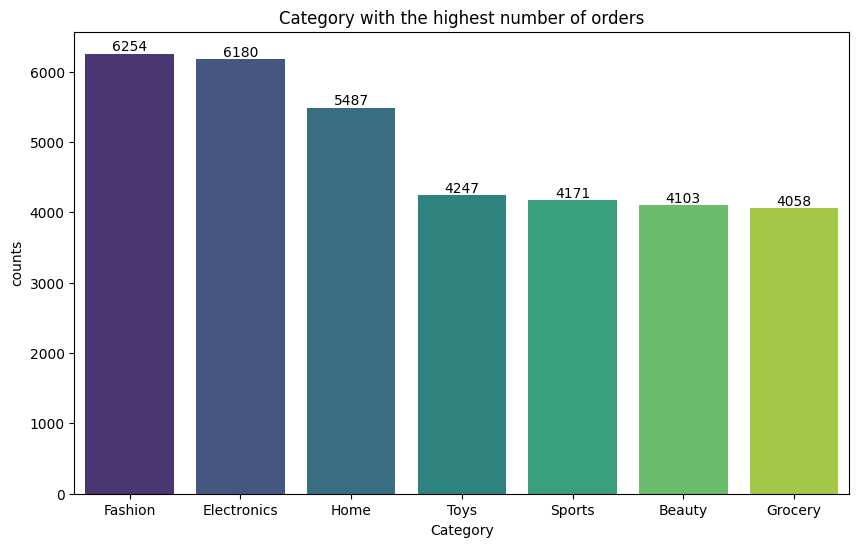

/tmp/ipython-input-2901085238.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=category_sales.index, y=category_sales.values, palette= 'viridis')


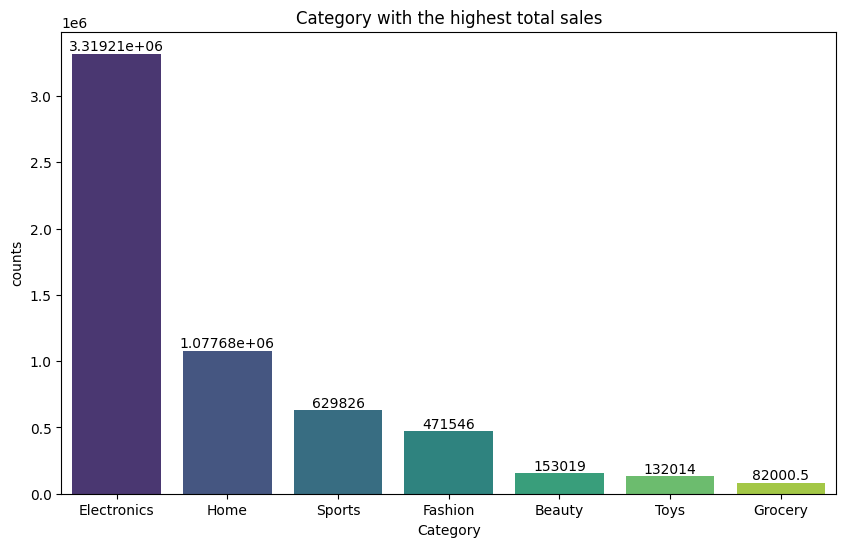

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x=category_order_counts.index, y=category_order_counts.values, palette= 'viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Category with the highest number of orders')
plt.xlabel('Category')
plt.ylabel('counts')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(10,6))
ax=sns.barplot(x=highest_sales.index, y=category_sales.values, palette= 'viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Category with the highest total sales')
plt.xlabel('Category')
plt.ylabel('counts')
plt.xticks(rotation=0)
plt.show()

# How are orders distributed across different regions

In [ ]:
region_distribution = df['region'].value_counts()
print("Order Distribution by Region:")
print(region_distribution)

Order Distribution by Region:
region
South      7584
North      7572
East       6904
West       6808
Central    5632
Name: count, dtype: int64


/tmp/ipython-input-2947878916.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=region_distribution.index, y=region_distribution.values, palette= 'viridis')


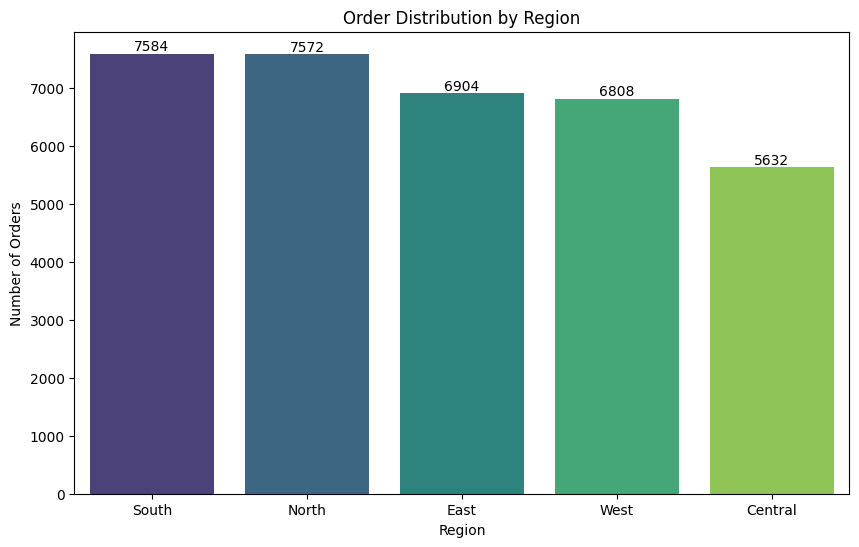

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x=region_distribution.index, y=region_distribution.values, palette= 'viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Order Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()

# What is the most popular payment_method used by customers?

The most popular payment method is:  Credit Card


/tmp/ipython-input-3634022174.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette='viridis')


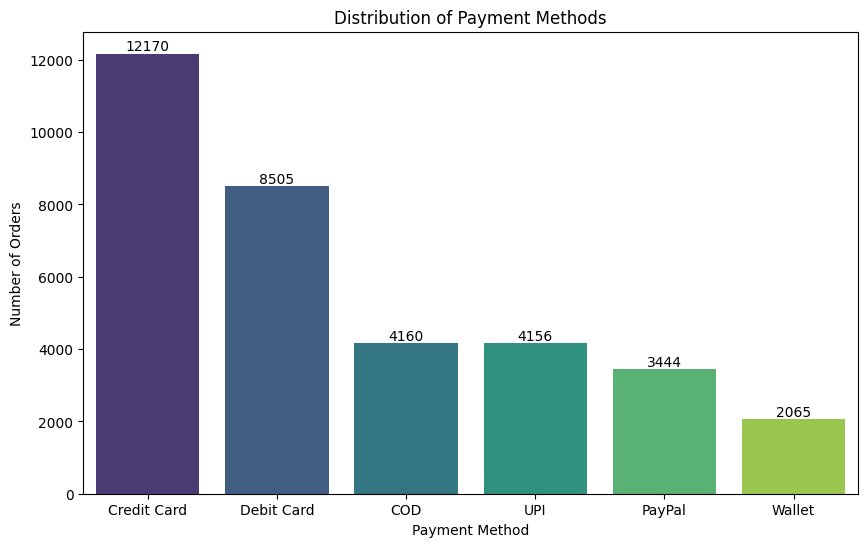

In [ ]:
# Find the most popular payment method
payment_method_counts = df['payment_method'].value_counts()
most_popular_payment_method = payment_method_counts.index[0]
print("The most popular payment method is: ",most_popular_payment_method)

plt.figure(figsize=(10,6))
ax=sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()

# **Data Aggregation & Trend Analysis**

# How does sales revenue vary by month and year? Are there specific months with peak sales?

In [ ]:
# Convert 'order_date' to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract month and year
df['order_month'] = df['order_date'].dt.to_period('M')

# Group by month and year and sum total_amount
monthly_sales = df.groupby('order_month')['total_amount'].sum().reset_index()

# Convert 'order_month' back to string for plotting
monthly_sales['order_month'] = monthly_sales['order_month'].astype(str)

print("Monthly Sales Revenue:")
print(monthly_sales)

# Identify months with peak sales
peak_sales_month = monthly_sales.loc[monthly_sales['total_amount'].idxmax()]
print(f"\nMonth with peak sales: {peak_sales_month['order_month']} with total sales of ${peak_sales_month['total_amount']:,.2f}")

Monthly Sales Revenue:
   order_month  total_amount
0      2023-09     151135.60
1      2023-10     262502.74
2      2023-11     240286.91
3      2023-12     255617.03
4      2024-01     217766.09
5      2024-02     228013.98
6      2024-03     248176.28
7      2024-04     265596.66
8      2024-05     264875.23
9      2024-06     234155.38
10     2024-07     253369.40
11     2024-08     212613.20
12     2024-09     218873.90
13     2024-10     258931.27
14     2024-11     250572.04
15     2024-12     278154.19
16     2025-01     224390.21
17     2025-02     215338.19
18     2025-03     239346.81
19     2025-04     263024.03
20     2025-05     248527.46
21     2025-06     248776.28
22     2025-07     249593.50
23     2025-08     243808.50
24     2025-09      91848.17

Month with peak sales: 2024-12 with total sales of $278,154.19


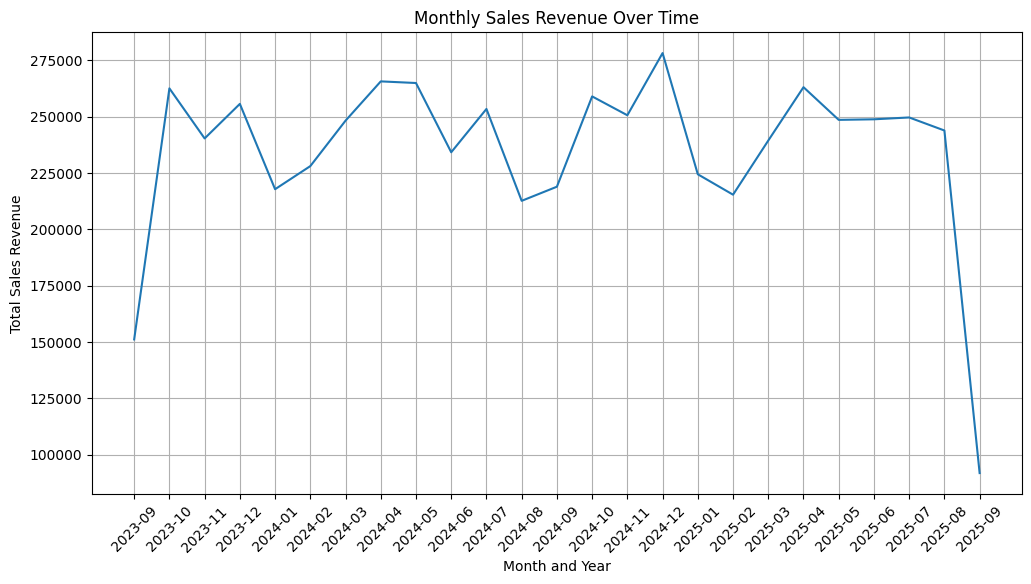

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_month', y='total_amount', data=monthly_sales)
plt.title('Monthly Sales Revenue Over Time')
plt.xlabel('Month and Year')
plt.ylabel('Total Sales Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Who are the top 10 customers by total spending? What percentage of total revenue do they contribute?

/tmp/ipython-input-3352600752.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_customers.index, y=top_10_customers.values, palette='viridis')


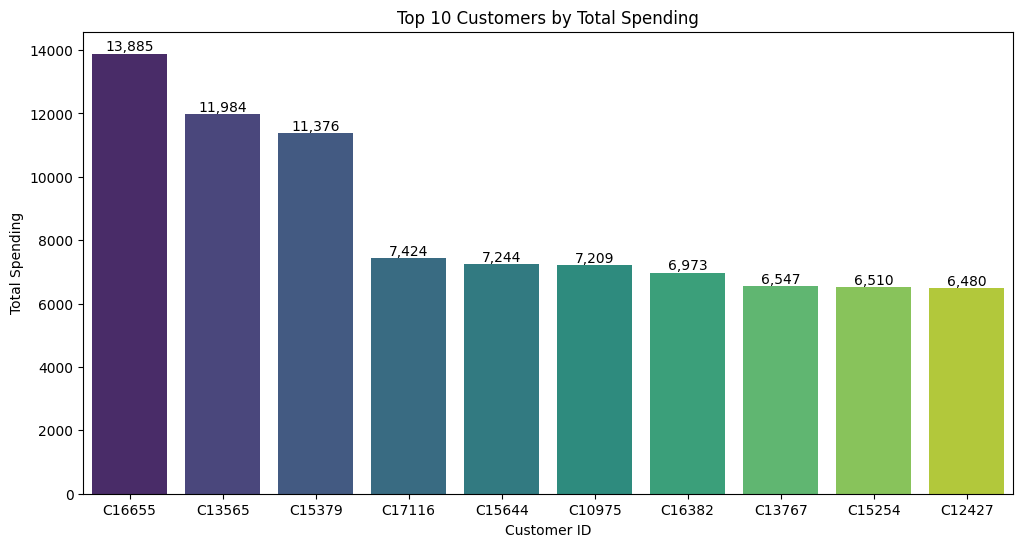

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_customers.index, y=top_10_customers.values, palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars, fmt='{:,.0f}')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.xticks(rotation=0)
plt.show()

# What are the top 5 most profitable products? What are the top 5 best-selling products by quantity?

In [ ]:
# Group by product and sum profit margin to find most profitable products
product_profit = df.groupby('product_id')['profit_margin'].sum()
top_5_profitable_products = product_profit.sort_values(ascending=False).head(5)

print("Top 5 Most Profitable Products:")
print(top_5_profitable_products)

# Group by product and sum quantity to find best-selling products
product_sales_quantity = df.groupby('product_id')['quantity'].sum()
top_5_selling_products_quantity = product_sales_quantity.sort_values(ascending=False).head(5)

print("\nTop 5 Best-Selling Products by Quantity:")
print(top_5_selling_products_quantity)

Top 5 Most Profitable Products:
product_id
P217031    1564.35
P242326    1399.03
P224743    1341.91
P247897    1115.90
P218759    1004.97
Name: profit_margin, dtype: float64

Top 5 Best-Selling Products by Quantity:
product_id
P222065    14
P211187    13
P247881    13
P234626    12
P242018    11
Name: quantity, dtype: int64


/tmp/ipython-input-2235828702.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_profitable_categories.index, y=top_profitable_categories.values, palette='viridis')


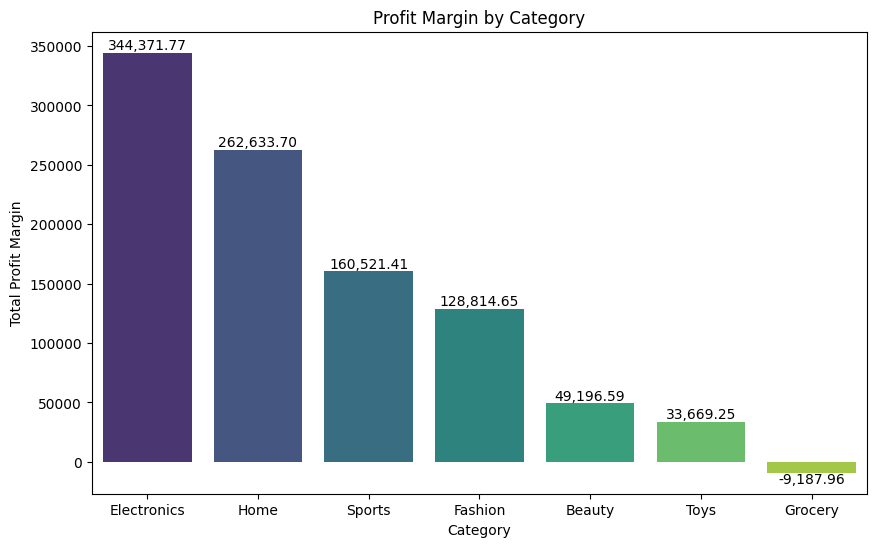

/tmp/ipython-input-2235828702.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_selling_categories_quantity.index, y=top_selling_categories_quantity.values, palette='viridis')


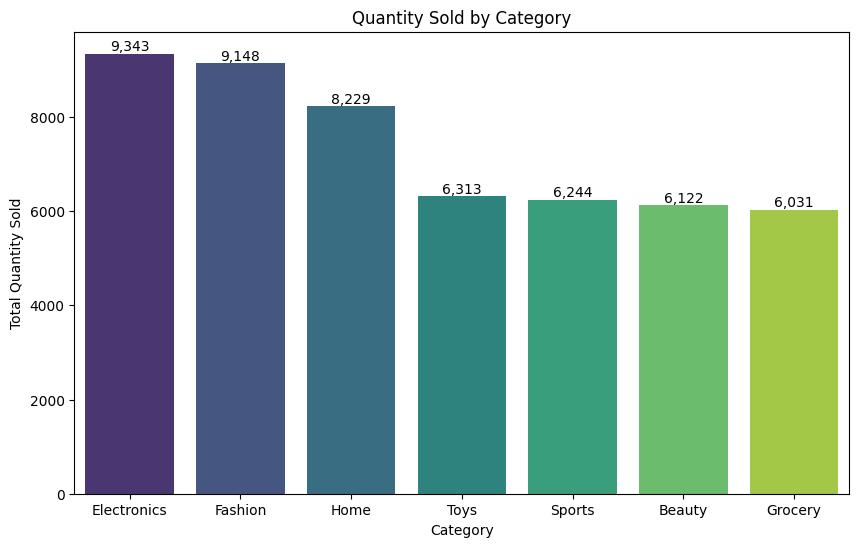

In [ ]:
category_profit = df.groupby('category')['profit_margin'].sum()
top_profitable_categories = category_profit.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_profitable_categories.index, y=top_profitable_categories.values, palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars, fmt='{:,.2f}')
plt.title('Profit Margin by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit Margin')
plt.xticks(rotation=0)
plt.show()

category_sales_quantity = df.groupby('category')['quantity'].sum()
top_selling_categories_quantity = category_sales_quantity.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_selling_categories_quantity.index, y=top_selling_categories_quantity.values, palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars, fmt='{:,.0f}')
plt.title('Quantity Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=0)
plt.show()

# Which region is the most profitable? Which region has the highest average order value (total_amount)?

/tmp/ipython-input-2712640083.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=total_profit_by_region.index, y=total_profit_by_region.values, palette='viridis')


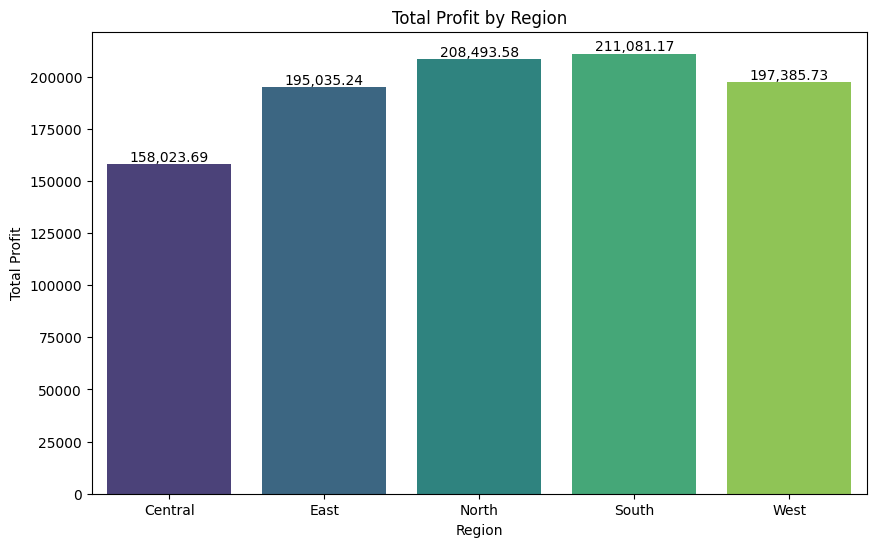

/tmp/ipython-input-2712640083.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=average_order_value_by_region.index, y=average_order_value_by_region.values, palette='viridis')


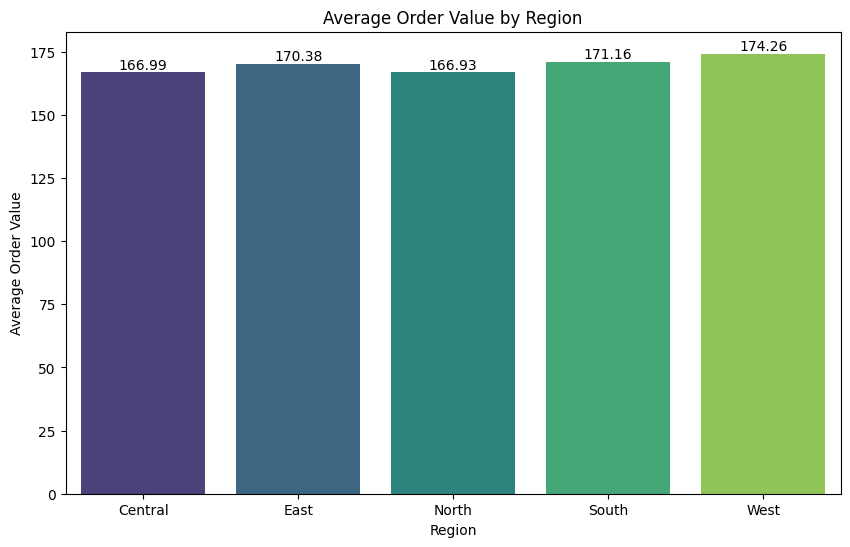

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=total_profit_by_region.index, y=total_profit_by_region.values, palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars, fmt='{:,.2f}')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=average_order_value_by_region.index, y=average_order_value_by_region.values, palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars, fmt='{:,.2f}')
plt.title('Average Order Value by Region')
plt.xlabel('Region')
plt.ylabel('Average Order Value')
plt.xticks(rotation=0)
plt.show()

# What is the overall return rate (percentage of orders where returned is 'Yes')? Which product category has the highest return rate?

In [ ]:
total_orders = len(df)
returned_orders = df[df['returned'] == 'Yes'].shape[0]
overall_return_rate = (returned_orders / total_orders) * 100
print(f"Overall Return Rate: {overall_return_rate:.2f}%")

category_returns = df[df['returned'] == 'Yes']['category'].value_counts()
category_order_counts = df['category'].value_counts()
category_return_rate = (category_returns / category_order_counts) * 100

print("\nReturn Rate by Product Category:")
print(category_return_rate.sort_values(ascending=False))

highest_return_category = category_return_rate.idxmax()
print(f"\nProduct Category with the Highest Return Rate: {highest_return_category}")

Overall Return Rate: 5.52%

Return Rate by Product Category:
category
Fashion        8.282699
Electronics    7.297735
Home           5.649718
Toys           4.944667
Sports         4.938864
Beauty         3.777724
Grocery        1.306062
Name: count, dtype: float64

Product Category with the Highest Return Rate: Fashion


/tmp/ipython-input-4148365491.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_return_rate.index, y=category_return_rate.values, palette='viridis')


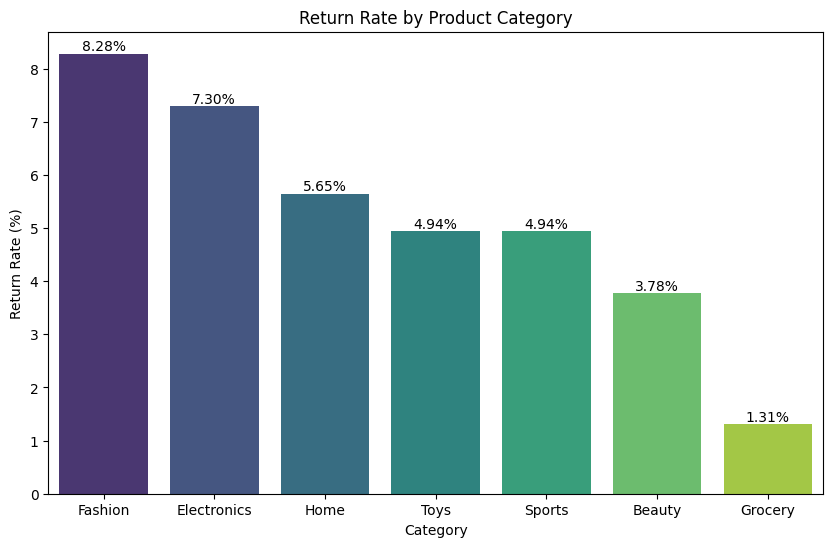

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=category_return_rate.index, y=category_return_rate.values, palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f%%')
plt.title('Return Rate by Product Category')
plt.xlabel('Category')
plt.ylabel('Return Rate (%)')
plt.xticks(rotation=0)
plt.show()

# What is the average delivery_time_days? Is there a relationship between shipping cost and delivery time?

In [ ]:
average_delivery_time = df['delivery_time_days'].mean()
print(f"Average Delivery Time: {average_delivery_time:.2f} days")

correlation_shipping_delivery = df['shipping_cost'].corr(df['delivery_time_days'])
print(f"Correlation between Shipping Cost and Delivery Time: {correlation_shipping_delivery:.2f}")

Average Delivery Time: 4.81 days
Correlation between Shipping Cost and Delivery Time: 0.01


that indicates very weak relationship

# Calculate the average profit margin for each product category. Which category is the most profitable?

In [ ]:
average_profit_margin_by_category = df.groupby('category')['profit_margin'].mean()

print("Average Profit Margin by Product Category:")
print(average_profit_margin_by_category)

most_profitable_category_avg = average_profit_margin_by_category.idxmax()
print(f"\nProduct Category with the Highest Average Profit Margin: {most_profitable_category_avg}")

Average Profit Margin by Product Category:
category
Beauty         11.990395
Electronics    55.723587
Fashion        20.597162
Grocery        -2.264160
Home           47.864717
Sports         38.485114
Toys            7.927773
Name: profit_margin, dtype: float64

Product Category with the Highest Average Profit Margin: Electronics


/tmp/ipython-input-31393083.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=average_profit_margin_by_category.index, y=average_profit_margin_by_category.values, palette='viridis')


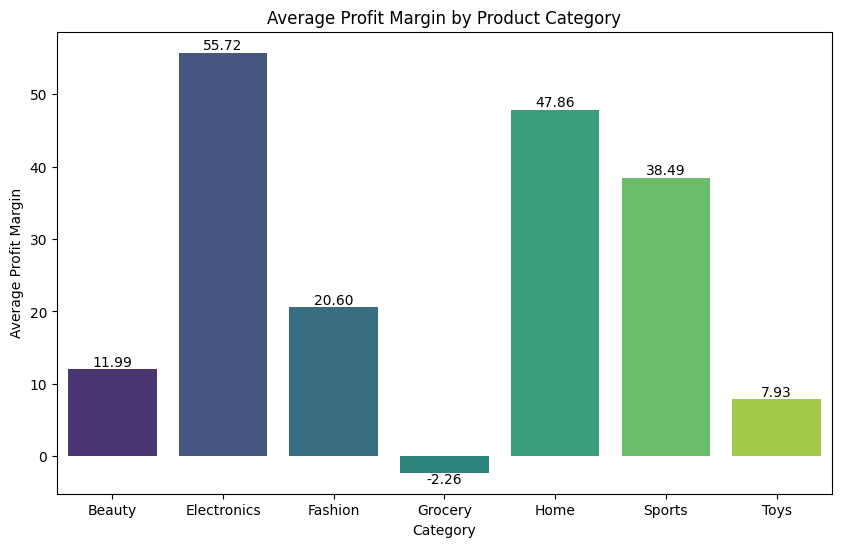

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=average_profit_margin_by_category.index, y=average_profit_margin_by_category.values, palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars, fmt='{:,.2f}')
plt.title('Average Profit Margin by Product Category')
plt.xlabel('Category')
plt.ylabel('Average Profit Margin')
plt.xticks(rotation=0)
plt.show()